# $$Trabajo\ Práctico\ Nº1$$

$$ANÁLISIS\ NUMÉRICO$$

$$2do\  Cuatrimestre\ 2018$$

$$Gupo\ S2:$$

$$Alumnos$$

$$Batallan,\ David\ Leonardo$$

$$Urquiza,\ Elías\ Santos$$

$$Galante,\ Julieta\ Cloé$$

$$Torres,\ Delfina$$

# ESTO SE VA BORRANDO MIENTRAS SE COMPLETA#
$Deben\ elegir\ un\ método\ de\ arranque,\ comentando\ brevemente\ el\ motivo\ de\ su\ elección\ e\ indicar\ el\ resultado\ obtenido.$

$1.B. Método\ de\ refinamiento$

$Deben\ elegir\ un\ método\ de\ refinamiento,\ comentando\ brevemente\ el\ motivo\ de\ su\ elección,\ justificar\ la\ selección\ del\ valor\ inicial,\ e\ indicar\ el\ resultado\ obtenido.$

$1.C\ Análisis\ de\ resultados$

$Concluir\ sobre\ los\ resultados\ obtenidos$

$2. Planteo\ de\ problema\ con\ resolución\ abierta$

$¿Qué\ pasa\ si\ en\ vez\ de\ conocer\ la\ función,\ solamente\ tengo\ una\ grilla\ de\ puntos\ (x,y=f(x))?\ ¿Cómo\ resolvería\ el\ problema\ de\ búsqueda\ de\ raíces?$

$Se\ propone\ generar\ una\ tabla,\ a\ partir\ de\ la\ función,\ de\ 30\ puntos\ dentro\ del\ intervalo\ elegido\ y\ pensar\ de\ forma\ abierta\ una\ solución\ al\ problema.$ 
$Lo\ que\ se\ espera\ en\ esta\ etapa\ es\ que\ cada\ grupo\ pueda\ proponer\ ideas\ sobre\ como\ resolvería\ este\ problema\ a\ partir\ de\ sus\ conocimientos\ previos,$ 
$utilizando\ la\ imaginación\ y\ lo\ visto\ hasta\ ahora.\ No\ va\ a\ ser\ evaluado\ en\ términos\ de\ "correcto/incorrrecto"\ sino\ en\ la\ capacidad\ de\ presentar\ una\ propuesta\ con\ ideas\ claras\ y\ originales.$

##  $0.\ Introducción$

_En el presente informe se pretende calcular la raíz de la función_

$$G(z) = \frac{\lambda\ R\ z}{(2\ \epsilon_{0})\ (z^2 + R^2)^{\frac{3}{2}}} -5000$$ 

_de modo tal que la función_

$$E(z) = \frac{\lambda\ R\ z}{(2\ \epsilon_{0})\ (z^2 + R^2)^{\frac{3}{2}}} = 5000 \frac{N}{C}.$$ 

_Constantes utilizadas:_

$$\lambda = 0,1 \mu C$$

$$R = 20 cm$$

$$\epsilon_{0} = 8,85x10^{-12}$$

_Esto lo haremos utilizando métodos numéricos, implementados en Python 3.6, cuyo código será presentado junto con el informe._

_A continuación, inicializamos los valores con los que trabajaremos, al igual que presentaremos un gráfico de la función, y después procederemos a explicar los métodos utiizados._

 

_Para implementar estos métodos, escribimos un código fuente en Python 3.6 que presentaremos a continuación, intercalado con el informe._ 

In [5]:
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt

#Se declara z como variable simbólica
z = sm.symbols('z')

#Se declara la función simbólica
cadena = '1130 * z/((z ** 2 +0.2 ** 2 )^ (3/2)) -5000'
funcion=sm.sympify(cadena)
#Se declara la función derivada simbólica

derivada = sm.diff(funcion,z)


#Se declara la función numérica
G = sm.lambdify(z, funcion)
#Se declara la función derivada

Gp= sm.lambdify(z, derivada)

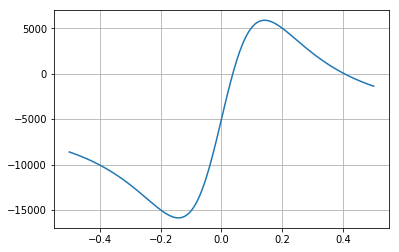

In [6]:
#Se grafica la función a partir de la función numérica
x = np.linspace(-0.5,0.5,101)
plt.plot(x,G(x))
plt.grid()
plt.show()

## $1.\ Resolución\ a\ través\ de\ dos\ métodos\ numéricos$

_Fueron elegidos el método de la Bisección como método de arranque y el de Newton-Raphson como método de refinamiento, ya que, por un lado, son aplicables a la función elegida porque ésta cumple con las condiciones que cada método requiere; tiene multiplicidad impar y es continua en el intervalo elegido, lo cual satisface al primero, y también lo es su derivada, lo cual satisface parte del segundo._}

_Sea [a;b] un intervalo en el que se encuentra una única raiz, podemos definir ambos métodos brevemente._

**_Método de la Bisección:_**

$$p_{n}=\frac{a_{n}\ b_{n}}{2}$$

$$
\mbox{donde, para las siguientes iteraciones, se cumple}\begin{cases}
\mbox{si $f(a_{n})f(p_{n}) < 0$},
& \mbox{$a_{n+1} = a_{n}$ y $b_{n+1}=p_{n}$}
\\
\mbox{si $f(a_{n})f(p_{n}) > 0$},
& \mbox{$a_{n+1} = p_{n}$ y $b_{n+1}=b_{n}$}
\end{cases}
$$


_Con $a_{0} = a$ y $b_{0} = b$._

[CRITERIO DE CORTE?]

**_Método de Newton-Raphson:_**

$$p_{n+1} = p_{n} - \frac{f(p_{n})}{f'(p_{n})}$$

[Explicar el p_0 utilizado + criterio de corte]

_No cumple que la derivada sea distinta de cero en todo punto, pero este factor puede resultar de interés para probar qué sucede cuando se incluyen estos puntos. Por otro lado, resulta de interés analizar qué sucede al aplicarlos a la misma función, ya que presentan distintas características: el primero tiene orden de convergencia lineal, es lento pero asegura encontrar un valor de raíz y puede aplicarse en cualquier intervalo que cumpla que los valores iniciales elegidos sean de signos opuestos. El segundo tiene orden de convergencia cuadrático, es más veloz aunque no asegura encontrar una raíz y debe aplicarse en un intervalo lo suficientemente pequeño para que funcione, en dependencia de las características de la función._

### $1.A.\ Método\ de\ Arranque:\ Bisección$
 
_Tomándose  los valores de arranque (0.01, 0.025), que son relativamente cercanos a la raíz, el programa tarda 25 iteraciones en encontrar la raíz. Es un número considerablemente alto en relación a la cantidad que le llevó al método anterior. Tomando los extremos (-0.3 , 0.3), que fue el intervalo seleccionado para esta función tarda 30 iteraciones. Tomando un extremo de   -100 a 0 y el otro 0.2, hace de 37 a 28 iteraciones. Esto no es una diferencia muy grande teniendo en cuenta las distintas a la raíz; no se encuentra un intervalo que sea mucho más veloz que otro. Al tomar intervalos como (0, 3), (0,5) o (0,10), la aproximación es a otros valores, y no al de la raíz buscada._

In [10]:
#definimos "Error Relativo" como el cociente entre la diferencia de los ultimos valores obtenidos y el último valor 
def RelativeError(xi,xii):
    return abs((xii-xi)/xii)

#se define el intervalo [a;b]
a = -0.3
b = 0.3

#se inicializan las variables para implementar el criterio de corte
xi= -100
xii=100
i=1

#Se inicia bucle-while hasta que se cumpla el criterio de corte o se encuentre el 0
while RelativeError(xi,xii) > 0.01:
    xi = (a + b) / 2
    fa=G(a)
    fb=G(b)
    fxi=G(xi)
    if fxi == 0:
        raiz = c
        break
    elif fa * fxi <0:
        b=xi
    else :
        a = xi
    raiz = xi
    xii = (a+b)/2
    print('Iteración',i, '=',raiz)
    i=i+1

Iteración 1 = 0.0
Iteración 2 = 0.15
Iteración 3 = 0.075
Iteración 4 = 0.0375
Iteración 5 = 0.01875
Iteración 6 = 0.028124999999999997
Iteración 7 = 0.032812499999999994
Iteración 8 = 0.03515625
Iteración 9 = 0.036328125
Iteración 10 = 0.0369140625


Resultados observados

### $1.B.\ Método\ de\ refinamiento:\ Newton-Raphson$

_Los intervalos (0, 0.1), (0, 0.2), (0, 0.3), se necesitan 4 iteraciones para alcanzar un valor cercano a la raíz con la cota deseada. Para los valores (0.1, 0.4), (-0.1, –0.3), (-0.1, 0.2),(-0.1, 0.1) tarda 5 iteraciones pero halla el valor de otra raíz, por más de que estos intervalos no contengan dicha raíz._

_**Para (-0.2-0),** [???] el programa se traba porque aparece una division por cero y con (-0.2, 0.1) por overflow. Es probable que así sea por el mínimo que presenta la función, es decir, derivada cero o un valor muy pequeño._

In [9]:
#se define el intervalo [a;b]
a = -0.3
b = 0.3

#se inicializan las variables para implementar el criterio de corte
x0= 0.0
x1=20
i=1

while RelativeError(x0,x1) > 0.01:
    x1 = x0 - G(x0)/Gp(x0)
    x0=x1
    x1 = x0 - G(x0)/Gp(x0)
    raiz=x0
   
    print('Iteración',i, '=',raiz)
    i=i+1

Iteración 1 = 0.035398230088495575
Iteración 2 = 0.037242571594270836


### $1.C\ Análisis\ de\ resultados$
_Podríamos concluir a través de los resultados obtenidos que el método de la bisección es más seguro ya que dado cualquier intervalo que incluya a la raíz, se va a encontrar un valor que se aproxime a la raíz, a pesar de ser lento. El de Newton-Raphson para algunos intervalos probados resultó de gran utilidad ya que logró alcanzarse un valor en únicamente 4 iteraciones. Sin embargo, aún tomando intervalos que no incluyeran otras raíces, se aproximaron otras en lugar de la deseada. También se trabó el programa por presentar un mínimo la función. A pesar de ello, en este caso, podría elegirse el método de Newton-raphson por sobre el de la bisección ya que resulta notablemente más veloz y se pudo encontrar una zona en la que funcionó._

$\mbox{[Tal vez podría haber más?]}$

## $2.\ Planteo\ de\ problema\ con\ resolución\ abierta$

$$\mbox{¯\_(ツ)_/¯}$$


**Lo de juli asi sin más:
    Criterio de elección**

Fueron elegidos el método de la bisección como método de arranque y el de Newton-Raphson como método de refinamiento, ya que, por un lado, son aplicables a la función elegida porque ésta cumple con las condiciones que cada método requiere; es continua en el intervalo elegido, lo cual satisface al primero, y también lo es su derivada, lo cual satisface parte del segundo.
No cumple que la derivada sea distinta de cero en todo punto, pero este factor puede resultar de interés para probar qué sucede cuando se incluyen estos puntos. Por otro lado, resulta de interés analizar qué sucede al aplicarlos a la misma función, ya que presentan distintas características: el primero tiene orden de convergencia lineal, es lento pero asegura encontrar un valor de raíz y puede aplicarse en cualquier intervalo que cumpla que los valores iniciales elegidos sean de signos opuestos. El segundo tiene orden de convergencia cuadrático, es más veloz aunque no asegura encontrar una raíz y debe aplicarse en un intervalo lo suficientemente pequeño para que funcione, en dependencia de las características de la función. 

Prueba de intervalos:
Método de Newton-Raphson
Los intervalos (0,0.1), (0, 0.2), (0, 0.3), se necesitan 4 iteraciones para alcanzar un valor cercano a la raíz con la cota deseada. Para los valores (0.1, 0.4), (-0.1 ,– 0.3), (-0.1, 0.2),             (-0.1, 0.1) tarda 5 iteraciones pero halla el valor de otra raíz, por más de que estos intervalos no contengan dicha raíz.
 Para (-0.2-0), el programa se traba porque aparece una division por cero y con (-0.2, 0.1) por overflow. Es probable que así sea por el mínimo que presenta la función, es decir, derivada cero o un valor muy pequeño.
	Método de bisección
Tomándose  los valores de arranque (0.01, 0.025), que son relativamente cercanos a la raíz, el programa tarda 25 iteraciones en encontrar la raíz. Es un número considerablemente alto en relación a la cantidad que le llevó al método anterior. Tomando los extremos (-0.3 , 0.3), que fue el intervalo seleccionado para esta función tarda 30 iteraciones. Tomando un extremo de   -100 a 0 y el otro 0.2, hace de 37 a 28 iteraciones. Esto no es una diferencia muy grande teniendo en cuenta las distintas a la raíz; no se encuentra un intervalo que sea mucho más veloz que otro. Al tomar intervalos como (0, 3), (0,5) o (0,10), la aproximación es a otros valores, y no al de la raíz buscada.
 Podríamos concluir a través de los resultados obtenidos que el método de la bisección es más seguro ya que dado cualquier intervalo que incluya a la raíz, se va a encontrar un valor que se aproxime a la raíz, a pesar de ser lento. El de Newton-Raphson para algunos intervalos probados resultó de gran utilidad ya que logró alcanzarse un valor en únicamente 4 iteraciones. Sin embargo, aún tomando intervalos que no incluyeran otras raíces, se aproximaron otras en lugar de la deseada. También se trabó el programa por presentar un mínimo la función. A pesar de ello, en este caso, podría elegirse el método de Newton-raphson por sobre el de la bisección ya que resulta notablemente más veloz y se pudo encontrar una zona en la que funcionó.
